# Analyse der Bordkarten-kontrolldaten des BERs
Ein Studentenprojekt an der<br>
<img src="https://upload.wikimedia.org/wikipedia/de/thumb/9/90/Hochschule_f%C3%BCr_Wirtschaft_und_Recht_Berlin_logo.svg/500px-Hochschule_f%C3%BCr_Wirtschaft_und_Recht_Berlin_logo.svg.png?20090401201013" width="240" align="left" style="display:block;clear:both;"/>
<br><br><br><br>
Hochschule für Wirtschaft und Recht Berlin<br>
Fachbereich II - Duales Studium Wirtschaft / Technik<br>
<i>Modul: Business Intelligence (WI-201)</i>

<b>Repository</b> (inklusive <b>Voraussetzungen</b> und <b>Installationsanleitung</b>):<br>
https://github.com/italyboy2012/bi-project

## Importe

> Ziel dieses Schrittes ist es, die notwendigen Pakete zu importieren

In [16]:
# Import Datenbank-Konfiguration
#########################################
import dbCredentials
#print(dbCredentials.host)
#print(dbCredentials.username)
#print(dbCredentials.password)

# Import Libs
#########################################
from sqlalchemy import create_engine
import mysql.connector
from mysql.connector import errorcode
from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph

#########################################
# Sollten diese nicht installiert sein, dann einmalig folgende Befehle über die Eingabeaufforderung ausführen
    # !pip install mysql-connector-python
    # !pip install SQLAlchemy
    # !pip install PyMySQL
    # !pip install sqlalchemy_schemadisplay
    # (mehr Informationen zum 1. Befehl, MySQL-Connector: https://dev.mysql.com/doc/connector-python/en/connector-python-introduction.html )
    # (mehr Informationen zum 2. Befehl, SQLAlchemy: https://docs.sqlalchemy.org/en/14/index.html )
    
#########################################
from hilfsfunktionen import *
import pandas as pd
from IPython.display import display_html

## Datenbank für Daten aus operativen Quellsystemen anlegen

>Ziel dieses Schritts ist es, eine Datenkank für die Daten aus den operativen Quellsystemen (angereichert mit öffentlich zugänglichen Daten) zu erstellen.<br><br>
Stelle sicher, dass der lokale MySQL Server gestartet wurde.

In [46]:
connection = create_server_connection(dbCredentials.host, dbCredentials.username, dbCredentials.password)

db_name = 'biProjekt_Quelldaten'

# Falls bereits eine Datenbank mit dem in der Variable db_name definierten Namen existiert, wird sie mit diesem Befehl gelöscht:
create_database_query = "DROP DATABASE IF EXISTS " + db_name + ";"
create_database(connection, create_database_query)

# Erstellen der Datenbank mit dem in der Variable db_name definierten Namen
create_database_query = "CREATE DATABASE " + db_name + ";"
create_database(connection, create_database_query)


db_connection_str = 'mysql+pymysql://' + dbCredentials.username + ':' + dbCredentials.password + '@' + dbCredentials.host + '/' + db_name
db_connection = create_engine(db_connection_str)

MySQL Database connection successful
Database created successfully
Database created successfully


## Daten der operativen Quellsysteme in die Datenbank laden

> Ziel dieses Schritts ist es die Daten aus den operativen Quellsystemen (angereichert mit öffentlich zugänglichen Daten) aus den CSV-Dateien in die im vorherigen Schritt angelegte Datenbank zu laden.

In [47]:
# Daten aus den CSV-Dateien in die DataFrames laden
df_bkk = pd.read_csv("data/bkk-data.csv", sep=";")
df_spos = pd.read_csv("data/scanningPositions.csv", sep=";")
df_covid = pd.read_csv("data/covid19_cases.csv", sep=",")
df_airports = pd.read_csv("data/airports.csv", sep=",")
df_gdp = pd.read_csv("data/GDP.csv", sep=",")

# Daten aus den DataFrames in die Datenbank laden
df_bkk.to_sql(con=db_connection, name='BKK', if_exists='replace')
df_spos.to_sql(con=db_connection, name='ScanningPositions', if_exists='replace')
df_covid.to_sql(con=db_connection, name='Covid19', if_exists='replace')
df_airports.to_sql(con=db_connection, name='Airports', if_exists='replace')
df_gdp.to_sql(con=db_connection, name='GDP', if_exists='replace')

## Stichprobenartige Auswahl zur Testung des Imports

> Ziel dieses Schrittes ist es, die soeben in die Datenbank geladene CSV-Dateien testweise auszugenen.

In [19]:
df_airports = pd.read_sql('Select * FROM Airports;', index_col='index', con=db_connection)
df_airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
index,,,,,,,,,,,,,,,,,,
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,None,US,US-PA,Bensalem,no,00A,None,00A,None,None,None
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,None,US,US-KS,Leoti,no,00AA,None,00AA,None,None,None
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,None,US,US-AK,Anchor Point,no,00AK,None,00AK,None,None,None
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,None,US,US-AL,Harvest,no,00AL,None,00AL,None,None,None
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,None,US,US-AR,Newport,no,None,None,None,None,None,00AR


In [20]:
df_spos = pd.read_sql('Select * FROM ScanningPositions;', index_col='index', con=db_connection)
df_spos.head()

,ScanningPosition,latitude_spos,longitude_spos
index,,,
0,BKK 1.1,52.365.252,13.507.102
1,BKK 1.2,52.365.253,13.507.103
2,BKK 1.3 PRM,52.365.254,13.507.104
3,BKK 2.1,52.364.360,13.506.767
4,BKK 2.2,52.364.361,13.506.768


In [21]:
df_bkk = pd.read_sql('Select * FROM BKK;', index_col='index', con=db_connection)
df_bkk.head()

,TimeStamp,Terminal,ScanningPosition,Destination,TravelDate,Evaluation,STD,DocumentType
index,,,,,,,,
0,01.01.22 04:42,T1,BKK 1.2,None,None,Rejected,None,Unknown
1,01.01.22 04:53,T1,DTC PAV Nord,None,None,Rejected,None,Unknown
2,01.01.22 04:59,T1,BKK 4.4,None,None,Rejected,None,Unknown
3,01.01.22 05:03,T1,BKK 2.3,None,None,Rejected,None,Unknown
4,01.01.22 05:14,T1,BKK 2.4,None,None,Rejected,None,Unknown


In [22]:
df_beispiel = pd.read_sql('Select * FROM BKK'+
                            ' JOIN Airports on BKK.Destination = Airports.iata_code'+
                            ' Order By Airports.iata_code;', index_col=None, con=db_connection)

df_beispiel.head()

,index,TimeStamp,Terminal,ScanningPosition,Destination,TravelDate,Evaluation,STD,DocumentType,index,...,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,48107,03.01.22 11:51,T1,BKK 3.2 Fastlane,AAQ,03.01.22,Rejected,None,PDF417,59632,...,RU,RU-KDA,Anapa,yes,URKA,AAQ,None,http://basel.aero/en/anapa/,https://en.wikipedia.org/wiki/Anapa_Airport,Vityazevo Airport
1,14778,01.01.22 14:40,T1,BKK 4.4,ABA,02.01.22,Rejected,None,PDF417,59570,...,RU,RU-KK,Abakan,yes,UNAA,ABA,None,None,https://en.wikipedia.org/wiki/Abakan_Internati...,None
2,81203,06.01.22 07:00,T1,BKK 2.3,ABJ,06.01.22,Rejected,None,PDF417,20381,...,CI,CI-01,Abidjan,yes,DIAP,ABJ,None,None,https://en.wikipedia.org/wiki/F%C3%A9lix-Houph...,"Abidjan, Port Bouët"
3,66868,04.01.22 17:25,T1,DTC Nord 2,ABV,05.01.22,Rejected,00:00,PDF417,20471,...,NG,NG-FC,Abuja,yes,DNAA,ABV,None,http://www.faannigeria.org/nigeria-airport.php...,https://en.wikipedia.org/wiki/Nnamdi_Azikiwe_I...,None
4,66862,04.01.22 17:24,T1,BKK 2.4,ABV,05.01.22,Rejected,None,PDF417,20471,...,NG,NG-FC,Abuja,yes,DNAA,ABV,None,http://www.faannigeria.org/nigeria-airport.php...,https://en.wikipedia.org/wiki/Nnamdi_Azikiwe_I...,None


## Normalisierung

> Die soeben importierten Daten liegen in der nullten Normalform vor.<br>
Ziel dieses Schritts ist es, diese Daten in die dritte Normalform zu überführen.

In [23]:
# kann übersprungen werden

## Verknüpfen der importierten Tabellen

> Ziel dieses Schritts ist es, die sich in der Datenbank befindlichen Daten in eine einzige Datenbanktabelle zu überführen. Dies erleichtert es in einem zukünftigen Schritt ein Sternschema zu erstellen.

>Die Umsetzung erfolgte mittels Tableau Prep Builder. Die Ausgabe wurde ein eine neue Datenbank-Tabelle namens "joined_data" geschrieben. Die Tableau-Datei kann unter dem Pfad "tableau/20220330.1 joined_data.tfl" gefunden werden.

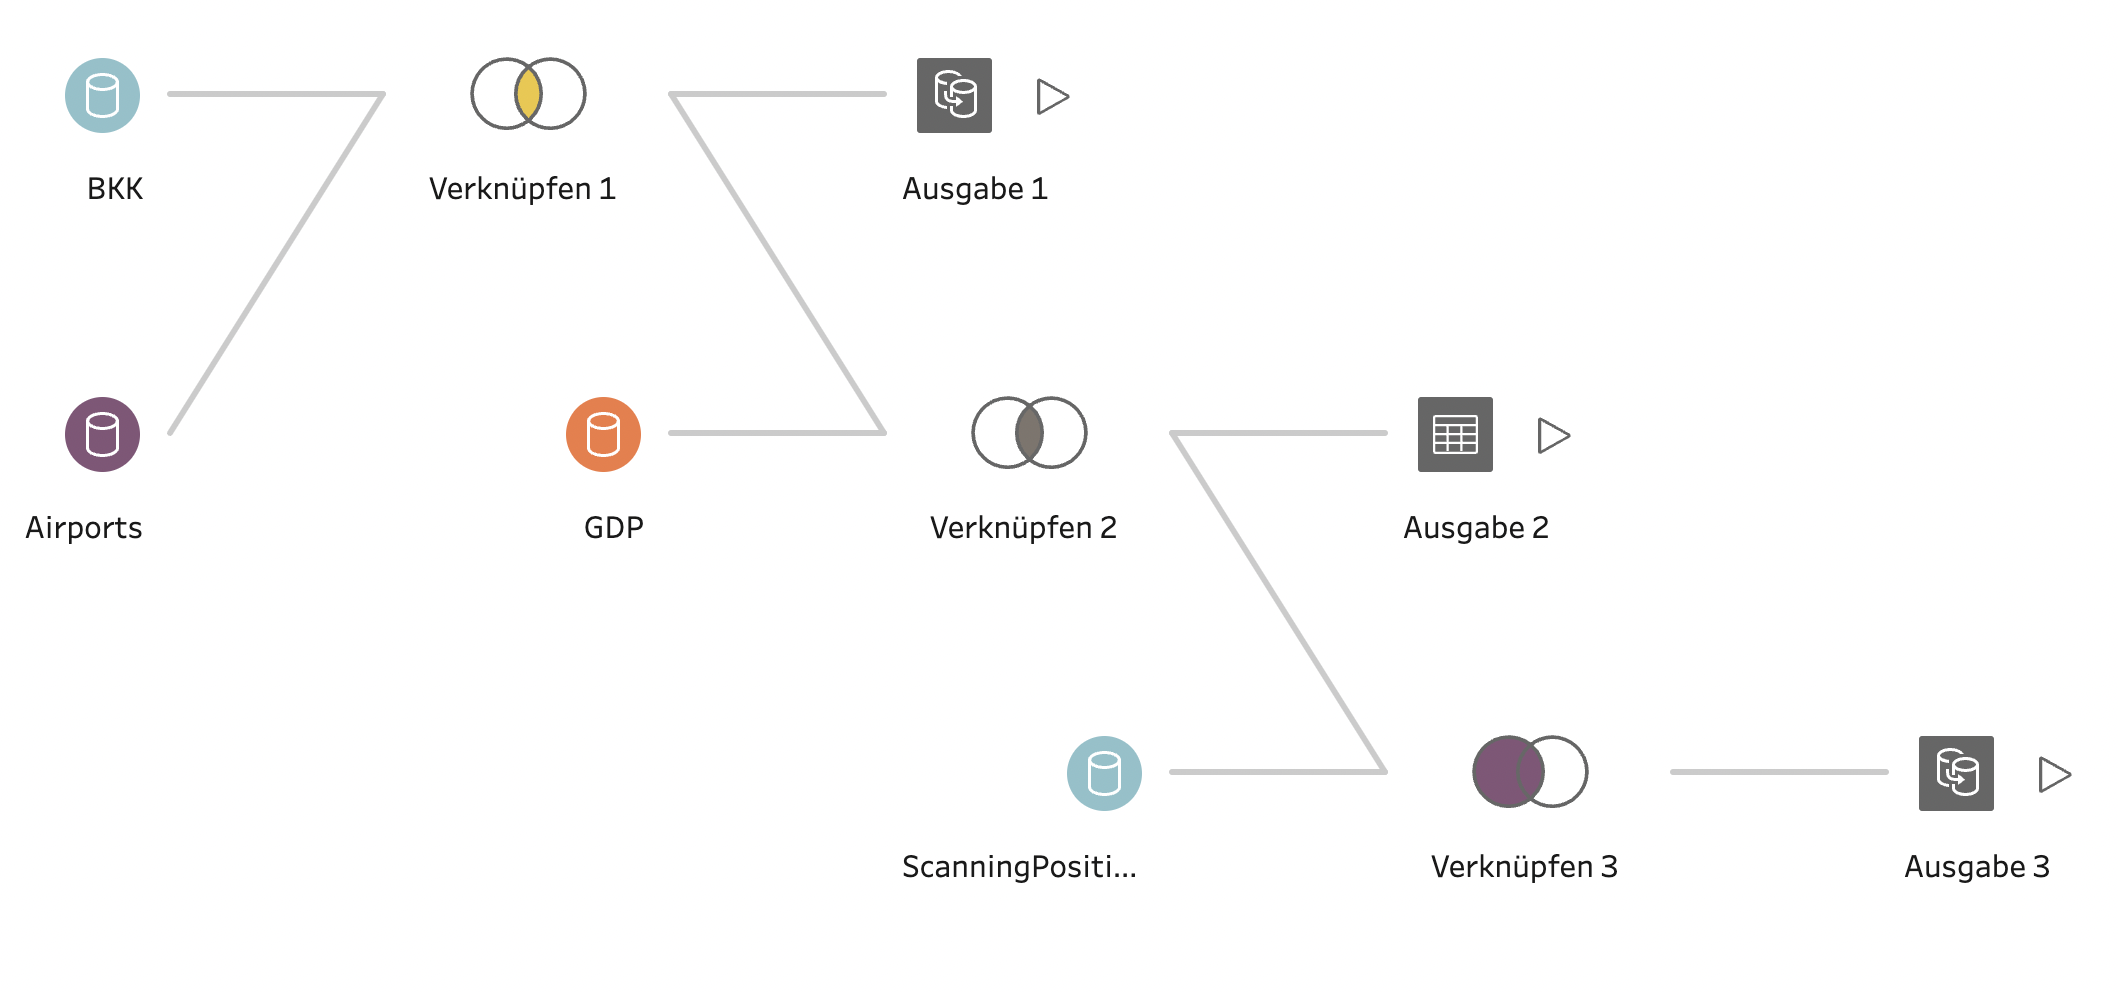

> Bitte stelle sicher, dass die "Ausgabe 3" der Datei "tableau/20220330.1 joined_data.tfl" über Tableau Prep Builder ausgeführt wurde.

In [48]:
df_joinedData = pd.read_sql('Select * FROM joined_data', index_col='index', con=db_connection)
df_joinedData.head()

,GDP (UN),STD,keywords,ident,municipality,type,GDP (IMF),Density,latitude_spos,Subregion,...,wikipedia_link,Government,TravelDate,home_link,DocumentType,local_code,Terminal,longitude_spos,2020 Population Rank,2020 World Percentage
index,,,,,,,,,,,,,,,,,,,,,
9214,$390.80 Bn,09:40,None,LOWW,Vienna,large_airport,$481.68 Bn,107.38,52.364.362,Western Europe,...,https://en.wikipedia.org/wiki/Vienna_Internati...,None,01.01.22,http://www.viennaairport.com/en/,Aztec,None,T1,13.506.769,97,0.12%
9215,$390.80 Bn,09:40,None,LOWW,Vienna,large_airport,$481.68 Bn,107.38,52.363.965,Western Europe,...,https://en.wikipedia.org/wiki/Vienna_Internati...,None,01.01.22,http://www.viennaairport.com/en/,Aztec,None,T1,13.506.997,97,0.12%
9216,$390.80 Bn,09:40,None,LOWW,Vienna,large_airport,$481.68 Bn,107.38,None,Western Europe,...,https://en.wikipedia.org/wiki/Vienna_Internati...,None,01.01.22,http://www.viennaairport.com/en/,Aztec,None,T1,None,97,0.12%
9217,$125.82 Bn,10:35,"Ferihegyi nemzetközi repülőtér, Budapest Liszt...",LHBP,Budapest,large_airport,$177.73 Bn,103.84,52.365.253,Eastern Europe,...,https://en.wikipedia.org/wiki/Budapest_Ferenc_...,Hungary,01.01.22,http://www.bud.hu/english,Aztec,None,T1,13.507.103,94,0.12%
9218,$125.82 Bn,10:35,"Ferihegyi nemzetközi repülőtér, Budapest Liszt...",LHBP,Budapest,large_airport,$177.73 Bn,103.84,52.365.254,Eastern Europe,...,https://en.wikipedia.org/wiki/Budapest_Ferenc_...,Hungary,01.01.22,http://www.bud.hu/english,Aztec,None,T1,13.507.104,94,0.12%


## Erstellen des Sternschemas

> Ziel dieses Schritts ist es, die soeben erstellte Tabelle "joined_data" in ein analyseorientiertes OLAT-Sternschema zu überführen.

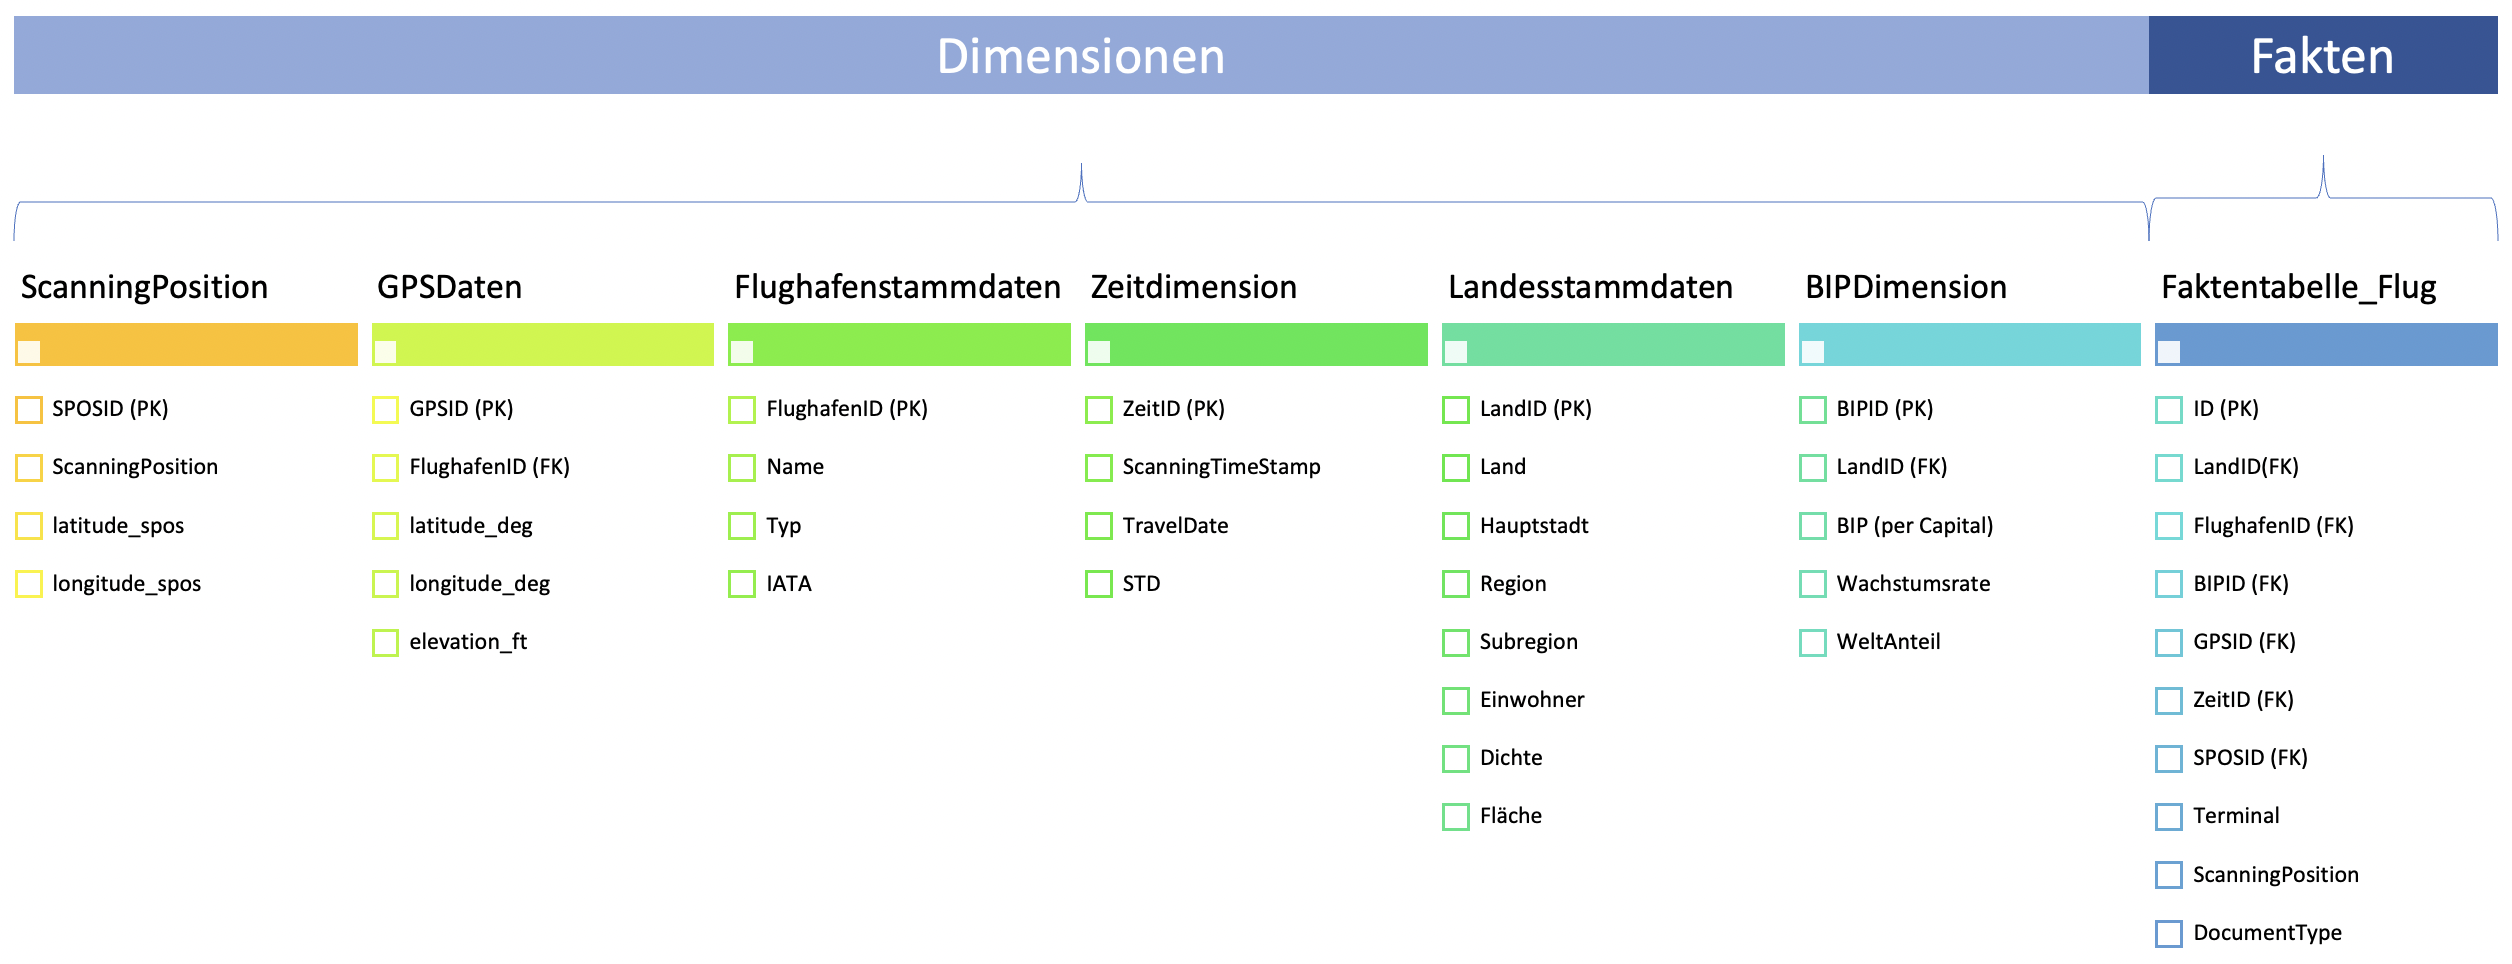

In [49]:
'''
####################################
PK = Primary Key (Primärschlüssel)
FK = Foreign Key (Fremdschlüssel)
####################################

########Dimensionstabellen:#########

GPSDaten:
        GPSID (PK),
        FlughafenID (FK),
        latitude_deg,
        longitude_deg,
        elevation_ft,
        
Flughafenstammdaten: 
        FlughafenID (PK), 
        Name, 
        Typ,
        IATA,

Zeitdimension: 
        ZeitID (PK),
        ScanningTimeStamp,
        TravelDate,
        STD,
        
Landesstammdaten:  
        LandID (PK)
        Land,
        Hauptstadt,
        Region
        Subregion,
        Einwohner,
        Dichte,
        Fläche,
        
BIPDimension:
        BIPID (PK),
        LandID (FK),
        BIP (per Capital),
        Wachstumsrate,
        WeltAnteil,
        
ScanningPosition:
        SPOSID (PK),
        ScanningPosition,
        latitude_spos,
        longitude_spos,

##########Faktentabelle:#############

Faktentabelle_Flug
        ID (PK),
        LandID(FK von Dimensionstabelle XX),
        FlughafenID (FK),
        BIPID (FK),
        GPSID (FK),
        ZeitID (FK),
        SPOSID (FK),
        Terminal,
        ScanningPosition,
        DocumentType,
'''

'\n####################################\nPK = Primary Key (Primärschlüssel)\nFK = Foreign Key (Fremdschlüssel)\n####################################\n\n########Dimensionstabellen:#########\n\nGPSDaten:\n        GPSID (PK),\n        FlughafenID (FK),\n        latitude_deg,\n        longitude_deg,\n        elevation_ft,\n        \nFlughafenstammdaten: \n        FlughafenID (PK), \n        Name, \n        Typ,\n        IATA,\n\nZeitdimension: \n        ZeitID (PK),\n        ScanningTimeStamp,\n        TravelDate,\n        STD,\n        \nLandesstammdaten:  \n        LandID (PK)\n        Land,\n        Hauptstadt,\n        Region\n        Subregion,\n        Einwohner,\n        Dichte,\n        Fläche,\n        \nBIPDimension:\n        BIPID (PK),\n        LandID (FK),\n        BIP (per Capital),\n        Wachstumsrate,\n        WeltAnteil,\n        \nScanningPosition:\n        SPOSID (PK),\n        ScanningPosition,\n        latitude_spos,\n        longitude_spos,\n\n##########Faktentabel

In [50]:
df_GPSDaten = pd.read_sql('SELECT jd.id AS GPSID, jd.id AS FlughafenID, jd.latitude_deg, jd.longitude_deg, jd.elevation_ft FROM joined_data AS jd;', con=db_connection)
df_GPSDaten.drop_duplicates(inplace=True)
df_GPSDaten.set_index("GPSID", inplace=True)
df_GPSDaten.head()

,FlughafenID,latitude_deg,longitude_deg,elevation_ft
GPSID,,,,
4434,4434,48.110298,16.569700,600.0
4296,4296,47.429760,19.261093,495.0
4185,4185,49.012798,2.550000,392.0
2513,2513,52.308601,4.763890,-11.0
2533,2533,53.421299,-6.270070,242.0


In [51]:
df_Flughafenstammdaten = pd.read_sql('SELECT jd.id AS FlughafenID, jd.name, jd.type, jd.iata_code FROM joined_data AS jd;', con=db_connection)
df_Flughafenstammdaten.drop_duplicates(inplace=True)
df_Flughafenstammdaten.set_index("FlughafenID", inplace=True)
df_Flughafenstammdaten.head()

,name,type,iata_code
FlughafenID,,,
4434,Vienna International Airport,large_airport,VIE
4296,Budapest Liszt Ferenc International Airport,large_airport,BUD
4185,Charles de Gaulle International Airport,large_airport,CDG
2513,Amsterdam Airport Schiphol,large_airport,AMS
2533,Dublin Airport,large_airport,DUB


In [52]:
df_Zeitdimension = pd.read_sql('SELECT jd.id AS ZeitID, jd.TimeStamp As ScanningTimeStamp, jd.TravelDate, jd.STD FROM joined_data AS jd;', con=db_connection)
df_Zeitdimension.drop_duplicates(inplace=True)
df_Zeitdimension.set_index("ZeitID", inplace=True)
df_Zeitdimension.head()

,ScanningTimeStamp,TravelDate,STD
ZeitID,,,
4434,01.01.22 08:57,01.01.22,09:40
4434,01.01.22 08:59,01.01.22,09:40
4296,01.01.22 08:57,01.01.22,10:35
4296,01.01.22 08:58,01.01.22,10:35
4185,01.01.22 08:58,01.01.22,09:35


In [53]:
df_Landesstammdaten = pd.read_sql('SELECT jd.id AS LandID, jd.Country AS Land, jd.`Capital City` AS Hauptstadt, jd.Region, jd.Subregion, jd.`Population Rank`, jd.Density AS Dichte, jd.Area AS `Fläche` FROM joined_data AS jd;', con=db_connection)
df_Landesstammdaten.drop_duplicates(inplace=True)
df_Landesstammdaten.set_index("LandID", inplace=True)
df_Landesstammdaten.head()

,Land,Hauptstadt,Region,Subregion,Population Rank,Dichte,Fläche
LandID,,,,,,,
4434,Austria,Vienna,Europe,Western Europe,97.0,107.38,"83,871"
4296,Hungary,Budapest,Europe,Eastern Europe,94.0,103.84,"93,028"
4185,France,Paris,Europe,Western Europe,22.0,118.31,"551,695"
2513,Netherlands,Amsterdam,Europe,Western Europe,69.0,409.44,"41,850"
2533,Ireland,Dublin,Europe,Northern Europe,124.0,70.27,"70,273"


In [54]:
df_BIPDimension = pd.read_sql('SELECT jd.id AS BIPID, jd.id AS LandID, jd.`GDP Per Capita` AS `BIP pro Einw.`, jd.`Growth Rate` AS Wachstumsrate, jd.`World Percentage` AS WeltAnteil FROM joined_data AS jd;', con=db_connection)
df_BIPDimension.drop_duplicates(inplace=True)
df_BIPDimension.set_index("BIPID", inplace=True)
df_BIPDimension.head()

,LandID,BIP pro Einw.,Wachstumsrate,WeltAnteil
BIPID,,,,
4434,4434,"$53,481.76",0.57%,0.12%
4296,4296,"$18,398.3",-0.25%,0.12%
4185,4185,"$44,061.52",0.22%,0.84%
2513,2513,"$55,730.27",0.22%,0.22%
2533,2533,"$82,058.03",1.13%,0.06%


In [55]:
df_SPOSDimension = pd.read_sql('SELECT jd.id AS SPOSID, jd.ScanningPosition AS ScanningPosition, jd.`latitude_spos` AS `latitude_spos`, jd.`longitude_spos` AS `longitude_spos` FROM joined_data AS jd;', con=db_connection)
df_SPOSDimension.drop_duplicates(inplace=True)
df_SPOSDimension.set_index("SPOSID", inplace=True)
df_SPOSDimension.head()

,ScanningPosition,latitude_spos,longitude_spos
SPOSID,,,
4434,BKK 2.3,52.364.362,13.506.769
4434,BKK 3.2 Fastlane,52.363.965,13.506.997
4434,DTC Nord 1,None,None
4296,BKK 1.2,52.365.253,13.507.103
4296,BKK 1.3 PRM,52.365.254,13.507.104


In [56]:
df_FaktentabelleFlug = pd.read_sql('SELECT jd.id AS LandID, jd.id AS FlughafenID, jd.id AS BIPID, jd.id AS GPSID, jd.id AS ZeitID, jd.id AS SPOSID, jd.Terminal, jd.ScanningPosition, jd.DocumentType FROM joined_data AS jd;', con=db_connection)
df_FaktentabelleFlug.drop_duplicates(inplace=True)
# df_FaktentabelleFlug.set_index("ID", inplace=True)
df_FaktentabelleFlug.head()

,LandID,FlughafenID,BIPID,GPSID,ZeitID,SPOSID,Terminal,ScanningPosition,DocumentType
0,4434,4434,4434,4434,4434,4434,T1,BKK 2.3,Aztec
1,4434,4434,4434,4434,4434,4434,T1,BKK 3.2 Fastlane,Aztec
2,4434,4434,4434,4434,4434,4434,T1,DTC Nord 1,Aztec
3,4296,4296,4296,4296,4296,4296,T1,BKK 1.2,Aztec
4,4296,4296,4296,4296,4296,4296,T1,BKK 1.3 PRM,Aztec


## Erstellen einer OLAP-Datenbank

> Ziel dieses Schrittes ist es eine OLAP-Datenbank zu erstellen, um im nachfolgenden Schritt die Fakten- und Dimensionstabelle(n) in diese zu schreiben.

In [57]:
db_name = 'biProjekt_OLAP'

create_database_query = "DROP DATABASE IF EXISTS " + db_name + ";"
create_database(connection, create_database_query)

create_database_query = "CREATE DATABASE " + db_name + ";"
create_database(connection, create_database_query)

Database created successfully
Database created successfully


## Schreiben der Fakten- und Dimensionstabelle(n)

> Ziel dieses Schrittes ist es die Fakten- und Dimensionstabelle(n) in die OLAP-Datenbank zu schreiben.

In [58]:
db_connection_str = 'mysql+pymysql://' + dbCredentials.username + ':' + dbCredentials.password + '@' + dbCredentials.host + '/' + db_name
db_connection = create_engine(db_connection_str)

df_GPSDaten.to_sql(con=db_connection, name='GPSDaten', if_exists='replace')
df_Flughafenstammdaten.to_sql(con=db_connection, name='Flughafenstammdaten', if_exists='replace')
df_Zeitdimension.to_sql(con=db_connection, name='Zeitdimension', if_exists='replace')
df_Landesstammdaten.to_sql(con=db_connection, name='Landesstammdaten', if_exists='replace')
df_BIPDimension.to_sql(con=db_connection, name='BIPDimension', if_exists='replace')
df_SPOSDimension.to_sql(con=db_connection, name='ScanningPosition', if_exists='replace')
df_FaktentabelleFlug.to_sql(con=db_connection, name='FaktentabelleFlug', if_exists='replace')

In [59]:
# Schlüsselbeziehungen zwischen den Tabellen erstellen
query_table_relations = """
ALTER TABLE `FaktentabelleFlug` MODIFY `index` BIGINT;
ALTER TABLE `FaktentabelleFlug` MODIFY `LandID` BIGINT;
ALTER TABLE `FaktentabelleFlug` MODIFY `FlughafenID` BIGINT;
ALTER TABLE `FaktentabelleFlug` MODIFY `BIPID` BIGINT;
ALTER TABLE `FaktentabelleFlug` MODIFY `GPSID` BIGINT;
ALTER TABLE `FaktentabelleFlug` MODIFY `SPOSID` BIGINT;

ALTER TABLE `FaktentabelleFlug` ADD CONSTRAINT `FaktentabelleFlug_Land Id_fk` FOREIGN KEY (`LandID`) REFERENCES `Landesstammdaten`(`LandID`);
ALTER TABLE `FaktentabelleFlug` ADD CONSTRAINT `FaktentabelleFlug_Flug Id_fk` FOREIGN KEY (`FlughafenID`) REFERENCES `Flughafenstammdaten`(`FlughafenID`);
ALTER TABLE `FaktentabelleFlug` ADD CONSTRAINT `FaktentabelleFlug_BIP Id_fk` FOREIGN KEY (`BIPID`) REFERENCES `BIPDimension`(`BIPID`);
ALTER TABLE `FaktentabelleFlug` ADD CONSTRAINT `FaktentabelleFlug_GPS Id_fk` FOREIGN KEY (`GPSID`) REFERENCES `GPSDaten`(`GPSID`);
ALTER TABLE `FaktentabelleFlug` ADD CONSTRAINT `FaktentabelleFlug_Zeit Id_fk` FOREIGN KEY (`ZeitID`) REFERENCES `Zeitdimension`(`ZeitID`);
ALTER TABLE `FaktentabelleFlug` ADD CONSTRAINT `FaktentabelleFlug_SPOS Id_fk` FOREIGN KEY (`SPOSID`) REFERENCES `ScanningPosition`(`SPOSID`);
"""

# Connect to the Database
connection = create_db_connection(dbCredentials.host, dbCredentials.username, dbCredentials.password, db_name)
execute_query(connection, query_table_relations)

MySQL Database connection successful
Query successful


## Erstellen des ER-Modells

> Ziel dieses Schrittes ist es ein ER-Modell der OLAP-Datenbank zu erzeugen.

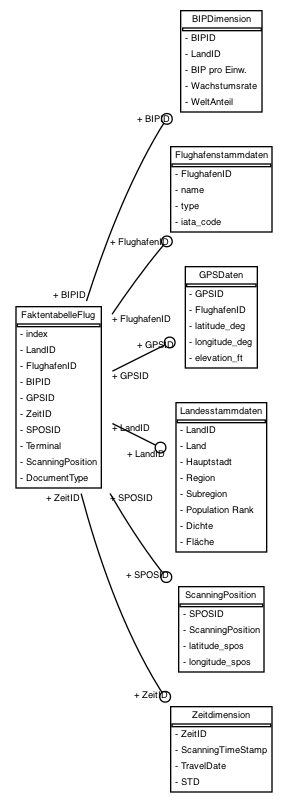

In [60]:
db_connection_str = 'mysql+pymysql://' + dbCredentials.username + ':' + dbCredentials.password + '@' + dbCredentials.host + '/' + db_name
# create the pydot graph object by autoloading all tables via a bound metadata object
graph = create_schema_graph(metadata=MetaData(db_connection_str),
   show_datatypes=False, # The image would get nasty big if we'd show the datatypes
   show_indexes=False, # ditto for indexes
   rankdir='LR', # From left to right (instead of top to bottom)
   concentrate=False # Don't try to join the relation lines together
)
graph.write_png(db_name+'_schema.png') # write out the file

from IPython.display import Image
Image(filename=db_name+'_schema.png') 

## Beantwortung businessrelevanter Fragestellungen

> Ziel dieses Schrittes ist es, die nun im SternSchema vorliegenden Daten zur Beantwortung von businessrelevanten Fragestellungen zu nutzen.

In [142]:
# code hier